In [1]:
# eda03_00a clear all variables and import vatious modules
%reset -f
import os
from datetime import date
from math import exp, pi, sin, sqrt, floor, ceil
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
#eda03_00b: definition of the eda_draw() function

# eda_draw function makes a "pictorial matrix equation"
# arguments are vectors, matrices and strings
# which are plotted in the order that the appear
# except that strings starting with 'title ' are plotted
# under the subseqeunt matrix or vector
# always returns a status of 1

def eda_draw(*argv):
    bw = np.zeros((256,4));
    v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
    bw[:,0] = v;
    bw[:,1] = v;
    bw[:,2] = v;
    bw[:,3] = np.ones(256);
    bwcmap = ListedColormap(bw);
    # size of plot
    W = 16;
    H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and height
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0];
                m = sh[1];
            if m==1:
                pold=p;
                left=p;
                right=p+LV;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p;
                left=p;
                right=p+LM;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;

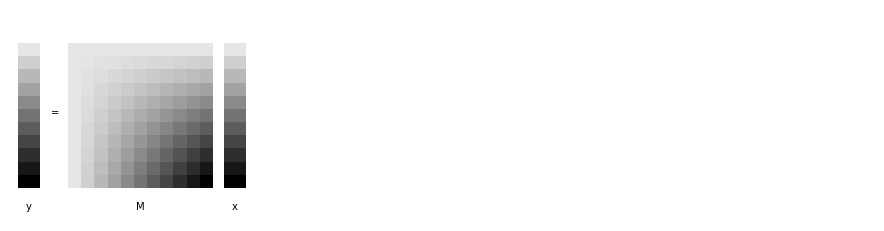

In [3]:
# eda03_00c: example of calling eda_draw()

# make the matrix equation y = M x
N=11;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,N-1,N);
M = np.matmul(x,x.T);
y = np.matmul(M,x);

# pictorially plot it
eda_draw('title y',y, '=', 'title M', M, 'title x', x);

In [5]:
# eda03_01  mode of p(d)

# define an exemplary p(d)
N=15;
Dd = 1.0;
d = np.zeros((N,1));
d[:,0] = Dd*np.linspace(0, N-1, N) + 0.5*Dd;
p = np.zeros((N,1));
p[:,0] = [5.00, 15.00, 10.00, 10.00, 10.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00];

# normalise so integral is unity
p = p / (Dd*np.sum(p));

# mode is maximum
k = np.argmax(p);
dmode = d[k];
print('mode', dmode );


mode [1.5]


In [7]:
# eda03_02 median of p(d)

# define an exemplary p(d)
N=15;
Dd = 1.0;
d = np.zeros((N,1));
d[:,0] = Dd*np.linspace(0, N-1, N) + 0.5*Dd;
p = np.zeros((N,1));
p[:,0] = [5.00, 15.00, 10.00, 10.00, 10.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00];

# normalise so integral is unity
p = p / (Dd*np.sum(p));

# median is 50% area point
P = np.cumsum(p);
for i in range(N):
    if P[i] >= 0.5:
        dmedian = d[i];
        break;

print('median', dmedian );

median [4.5]


In [6]:
# eda03_03 mean of p(d)

# define an exemplary p(d)
N=15;
Dd = 1.0;
d = np.zeros((N,1));
d[:,0] = Dd*np.linspace(0, N-1, N) + 0.5*Dd;
p = np.zeros((N,1));
p[:,0] = [5.00, 15.00, 10.00, 10.00, 10.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00];

# normalise so integral is unity
p = p / (Dd*np.sum(p));

# mean = (integral) d p(d) dd
dmean = Dd*np.sum(np.multiply(p,d));
print('mean', dmean );


mean 6.300000000000001


In [11]:
# eda03_04 variance of p(d)

# define an exemplary p(d)
N=15;
Dd = 1.0;
d = np.zeros((N,1));
d[:,0] = Dd*np.linspace(0, N-1, N) + 0.5*Dd;
p = np.zeros((N,1));
p[:,0] = [5.00, 15.00, 10.00, 10.00, 10.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00];

# normalise so integral is unity
p = p / (Dd*np.sum(p));

# mean = (integral) (d-dbar)^2 p(d) dd
dbar = Dd*np.sum(np.multiply(p,d));
q = np.power(d-dbar,2);
sigma2 = Dd*np.sum(np.multiply(q,p));
sigma = sqrt(sigma2);
print('sigma', sigma );


sigma 4.319722213291036


[[1.21517657e-09]
 [2.47858886e-09]
 [4.98328539e-09]
 [9.87582045e-09]
 [1.92919786e-08]
 [3.71472369e-08]
 [7.05054063e-08]
 [1.31905979e-07]
 [2.43249920e-07]
 [4.42167775e-07]
 [7.92259818e-07]
 [1.39924683e-06]
 [2.43594339e-06]
 [4.18009558e-06]
 [7.07052060e-06]
 [1.17886136e-05]
 [1.93740417e-05]
 [3.13851268e-05]
 [5.01156890e-05]
 [7.88805050e-05]
 [1.22380386e-04]
 [1.87154431e-04]
 [2.82120451e-04]
 [4.19194123e-04]
 [6.13962660e-04]
 [8.86369682e-04]
 [1.26134528e-03]
 [1.76929088e-03]
 [2.44630527e-03]
 [3.33402017e-03]
 [4.47890606e-03]
 [5.93091697e-03]
 [7.74137123e-03]
 [9.96001755e-03]
 [1.26313123e-02]
 [1.57900317e-02]
 [1.94564539e-02]
 [2.36314590e-02]
 [2.82919930e-02]
 [3.33874083e-02]
 [3.88372110e-02]
 [4.45306998e-02]
 [5.03288682e-02]
 [5.60687622e-02]
 [6.15702521e-02]
 [6.66449206e-02]
 [7.11065057e-02]
 [7.47821211e-02]
 [7.75233230e-02]
 [7.92160424e-02]
 [7.97884561e-02]
 [7.92160424e-02]
 [7.75233230e-02]
 [7.47821211e-02]
 [7.11065057e-02]
 [6.664492

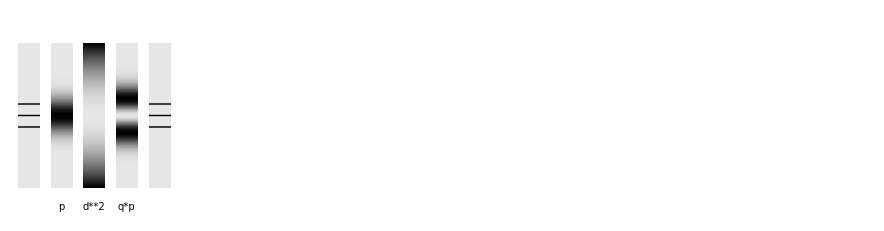

In [4]:
# eda03_05 visualation of process of computing variance

Nd = 101;
d = np.zeros((Nd,1));
d[:,0] = np.linspace(-30,30, Nd);
Dd = d[2,0]-d[1,0];

q = np.power(d,2);

# probability at fixed sigma
p = np.zeros((Nd,1));
db = 0;
sd = 5;
sd2 = sd**2;
g = (1/(sqrt(2*pi)*sd)) * np.exp( -0.5*np.power(d-db,2)/sd2);
print(g)
p[:,0]=g.ravel();
print(p)

qp = np.multiply(q,p);

# variance calcuation (just to check)
sigma2 =Dd * np.sum(qp);
sigma = sqrt(sigma2);

# find nearest element of array to d=dbar-sigma, d=dbar and d=dbar+sigma
v = np.abs(d-(db-sd));
ilo = np.argmin(v);
v = np.abs(d-db);
imi = np.argmin(v);
v = np.abs(d-(db+sd));
ihi = np.argmin(v);

# marker vector
mk = np.zeros((Nd,1));
mk[ilo,0] = 1;
mk[imi,0] = 1;
mk[ihi,0] = 1;

eda_draw(mk,'title p', p, 'title d**2', q, 'title q*p', qp, mk);

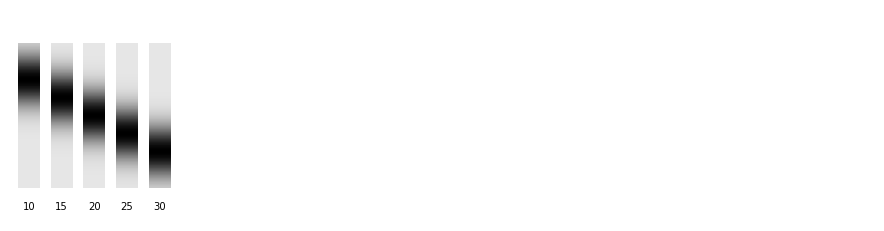

In [8]:
# eda03_06 visualation of effect of changing mean on p.d.f.

Ndbar=5;
dbar = np.zeros((Ndbar,1));
dbar[:,0] = np.linspace(10,30, Ndbar);

Nd = 101;
d = np.zeros((Nd,1));
d[:,0] = np.linspace(0,40, Nd);

# probability at fixed sigma
p = np.zeros((Nd,Ndbar));
sd = 5;
sd2 = sd**2;
titles = ();
for i in range(Ndbar):
    db = dbar[i];
    g = (1/(sqrt(2*pi)*sd)) * np.exp( -0.5*np.power(d-db,2)/sd2  );
    # seems silly, but we need to change "ravel" g from Ndx1 to Nd
    p[:,i]=g.ravel();
    t = "title %.0f" % db;
    titles = titles + (t,);

eda_draw(titles[0], p[:,0], titles[1], p[:,1], titles[2], p[:,2], titles[3], p[:,3], titles[4], p[:,4]);

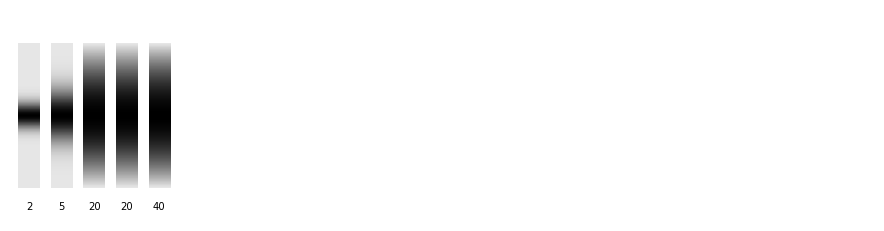

In [22]:
# eda03_07 visualation of effect of changing variance on p.d.f.

Nsigma=5;
sigma = np.zeros((Nsigma,1));
sigma[:,0] = [2.5, 5, 20, 20, 40];

Nd = 101;
d = np.zeros((Nd,1));
d[:,0] = np.linspace(0,40, Nd);

# probability at fixed sigma
p = np.zeros((Nd,Nsigma));
db = 20;
titles = ();
for i in range(Nsigma):
    sd = sigma[i];
    sd2 = sd**2;
    g = (1/(sqrt(2*pi)*sd)) * np.exp( -0.5*np.power(d-db,2)/sd2  );
    # seems silly, but we need to change "ravel" g from Ndx1 to Nd
    p[:,i]=g.ravel();
    t = "title %.0f" % sd
    titles = titles + (t,);

eda_draw(titles[0], p[:,0], titles[1], p[:,1], titles[2], p[:,2], titles[3], p[:,3], titles[4], p[:,4]);

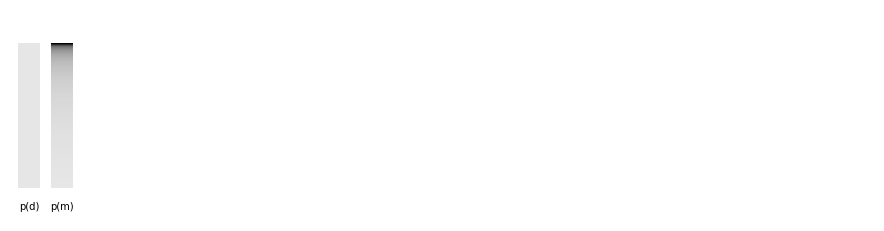

In [10]:
# eda03_08 transformation of variables m = d^2

Nd = 101;
d = np.zeros((Nd,1));
d[:,0] = np.linspace(0.01,1, Nd);
Dd = d[2,0] - d[1,0];

# uniform probability
pd = np.ones((Nd,1))/Dd;

Nm = 101;
m = np.zeros((Nm,1));
m[:,0] = np.linspace(0.01,1, Nm);
Dm = m[2,0] - m[1,0];

# uniform probability
pm = 0.5*np.reciprocal(np.sqrt(m));

eda_draw( 'title p(d)', pd, 'title p(m)', pm);

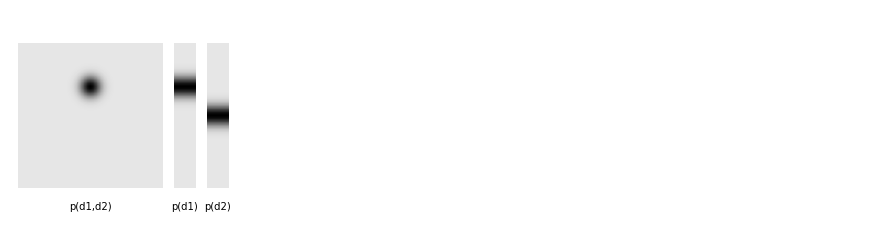

In [13]:
# eda03_09 joint p.f.d.

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5,Nd2);
Dd2 = d2[1,0] - d2[0,0];

# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;

# 2-d Normal p.d.f.
norm1 = (1/(sqrt(2*pi)*sigma1));
norm2 = (1/(sqrt(2*pi)*sigma2));
p1 = norm1 * np.exp( - np.power(d1-dbar1,2) / (2*sigma1*sigma1) );
p2 = norm2 * np.exp( - np.power(d2-dbar2,2) / (2*sigma2*sigma2) );
p = np.matmul( p1, p2.T );

# integrate along d2-axis to get p2
p_1 = np.zeros((Nd1,1));
p_1[:,0] = Dd2*np.sum(p,axis=1);      
        
# integrate along d1-axis to get p2
p_2 = np.zeros((Nd2,1));
p_2[:,0] = Dd1*np.sum(p,axis=0);

eda_draw( 'title p(d1,d2)', p, 'title p(d1)', p_1, 'title p(d2)', p_2);

area 0.9999999999999998


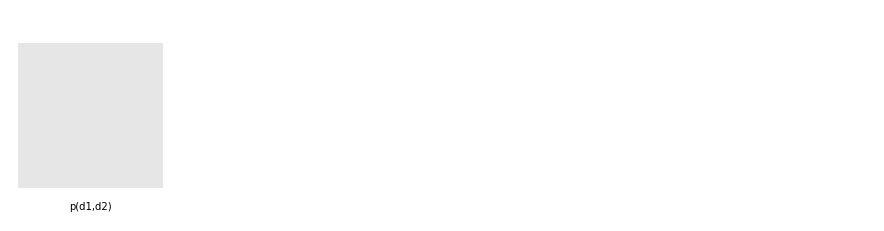

In [19]:
# eda03_10  normalising white p.d.f.

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5, Nd2);
Dd2 = d2[1,0] - d2[0,0];

p = np.ones((Nd1, Nd2));
norm = Dd1*Dd2*np.sum(p);
p = p/norm;

# area (should be 1)   
A = Dd1*Dd2*np.sum(p);
print('area',A);

eda_draw( 'title p(d1,d2)', p);

In [36]:
# eda03_11, 12 and 13 constructing a joint p.f.d. and computing its mean and variance

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5,Nd2);
Dd2 = d2[1,0] - d2[0,0];

# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;

# 2-d Normal p.d.f.
norm1 = (1/(sqrt(2*pi)*sigma1));
norm2 = (1/(sqrt(2*pi)*sigma2));
p1 = norm1 * np.exp( - np.power(d1-dbar1,2) / (2*sigma1*sigma1) );
p2 = norm2 * np.exp( - np.power(d2-dbar2,2) / (2*sigma2*sigma2) );
p = np.matmul( p1, p2.T );

# integrate along d2-axis to get p2
p_1 = np.zeros((Nd1,1));
p_1[:,0] = Dd2*np.sum(p,axis=1);      
        
# integrate along d1-axis to get p2
p_2 = np.zeros((Nd2,1));
p_2[:,0] = Dd1*np.sum(p,axis=0);

# areas (should all be 1)     
A = Dd1*Dd2*np.sum(p);
A1 = Dd1*np.sum(p_1);
A2 = Dd2*np.sum(p_2);

# vectors of ones
w1 = np.ones((Nd1,1));
w2 = np.ones((Nd2,1));

# eda03_12: means

# mean along 1 axis, computed from p
D1 = np.matmul( d1, w2.T );
dbar_1 = Dd1*Dd2*np.sum( np.multiply(D1, p) );

# mean along 1 axis, computed from p_1
dbar_1a = Dd1*np.sum( np.multiply(d1, p_1) );

# mean along 2 axis, computed from p
D2 = np.matmul( w1, d2.T  );
dbar_2 = Dd1*Dd2*np.sum( np.multiply(D2, p) );

# mean along 2 axis, computed from p_2
dbar_2a = Dd2*np.sum( np.multiply(d2, p_2) );

# eda03_13: variances

# variance along 1 axis, computed from p
D1s = np.matmul( np.power(d1-dbar1,2), w2.T );
sigma_1_squared = Dd1*Dd2*np.sum( np.multiply(D1s, p) );
sigma_1 = sqrt(sigma_1_squared);

# variance along 1 axis, computed from p1
sigma_1a_squared = Dd1*np.sum( np.multiply( np.power(d1-dbar_1,2), p_1) );
sigma_1a = sqrt(sigma_1_squared);

# variance along 2 axis, computed from p
D2s = np.matmul( w1, np.power(d2-dbar2,2).T  );
sigma2_squared = Dd1*Dd2*np.sum( np.multiply(D2s, p) );
sigma_2 = sqrt(sigma2_squared);

# variance along 2 axis, computed from p2
sigma_2a_squared = Dd2*np.sum( np.multiply( np.power(d2-dbar_2,2), p_2) );
sigma_2a = sqrt(sigma_2a_squared);

print('area',A, A1, A2);
print('dbar1',dbar1, dbar_1, dbar_1a);
print('dbar2',dbar2, dbar_2, dbar_2a);
print('sigma1',sigma1, sigma_1, sigma_1a);
print('sigma2',sigma2, sigma_2, sigma_2a);

area 0.999999999502085 0.999999999502085 0.9999999995020847
dbar1 1.5 1.500000000034364 1.5000000000343636
dbar2 2.5 2.4999999987552126 2.4999999987552117
sigma1 0.25 0.24999999754719845 0.24999999754719845
sigma2 0.25 0.24999999993776062 0.24999999993776062


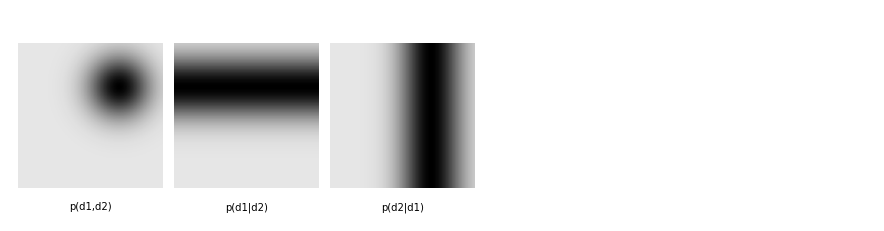

In [39]:
# eda03_14 conditional p.f.d.

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5,Nd2);
Dd2 = d2[1,0] - d2[0,0];

# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 3.5;
sigma1 = 0.75;
sigma2 = 0.75;

# 2-d Normal p.d.f.
norm1 = (1/(sqrt(2*pi)*sigma1));
norm2 = (1/(sqrt(2*pi)*sigma2));
p1 = norm1 * np.exp( - np.power(d1-dbar1,2) / (2*sigma1*sigma1) );
p2 = norm2 * np.exp( - np.power(d2-dbar2,2) / (2*sigma2*sigma2) );
p = np.matmul( p1, p2.T );

# integrate along d2-axis to get p2
p_1 = np.zeros((Nd1,1));
p_1[:,0] = Dd2*np.sum(p,axis=1);      
        
# integrate along d1-axis to get p2
p_2 = np.zeros((Nd2,1));
p_2[:,0] = Dd1*np.sum(p,axis=0);

# vectors of ones
w1 = np.ones((Nd1,1));
w2 = np.ones((Nd2,1));

# conditional p.d.f.: p(d1|d2) = p(d1,d2)/p2
p1g2 = np.divide( p, np.matmul(w1,p_2.T));

# conditional p.d.f.: p(d2|d1) = p(d1,d2)/p2
p2g1 = np.divide( p, np.matmul(p_1,w2.T));

eda_draw( 'title p(d1,d2)', p, 'title p(d1|d2)', p1g2, 'title p(d2|d1)', p2g1);

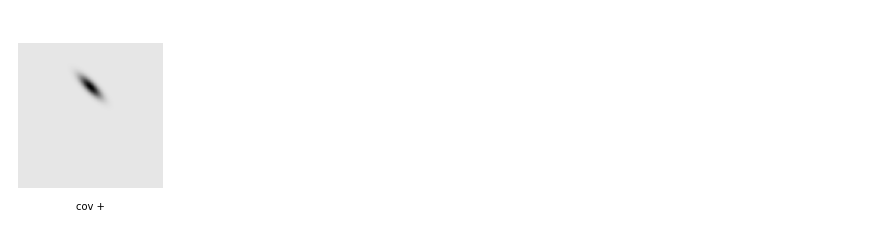

In [24]:
# eda03_15  Constructing Normal p.d.f. without for loop

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5,Nd2);
Dd2 = d2[1,0] - d2[0,0];

# vectors of ones
w1 = np.ones((Nd1,1));
w2 = np.ones((Nd2,1));

# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;
covar = 0.05;  # positive covariance
covpos = covar;
C = [ [sigma1**2, covar], [covar, sigma2**2]];
Ci = la.inv(C);
sqrtdet = sqrt(la.det(C));
norm=(1/(2*pi*sqrtdet));  # normalization

# Normal p.d.f.
dd1 = d1-dbar1;
dd2 = d2-dbar2;
dd11 = np.power(dd1,2);
dd22 = np.power(dd2,2);
p=norm*np.exp(-0.5*Ci[0,0]*np.matmul(dd11,w2.T)-0.5*Ci[1,1]*np.matmul(w1,dd22.T)-Ci[0,1]*np.matmul(dd1,dd2.T));

eda_draw( 'title cov +', p); 

cov +: 0.05 0.049999999018879374
cov -: -0.05 -0.049999999018879374
cov 0: 0.0 -1.7347234759768074e-19


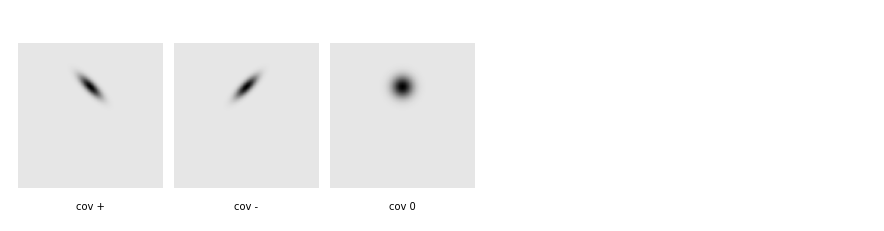

In [25]:
# eda03_16, 17  Constructing Normal p.d.f. with for loop and computing its covariance

# coordinate axes
Nd1 = 101;
d1 = np.zeros((Nd1,1));
d1[:,0] = np.linspace(0,5, Nd1);
Dd1 = d1[1,0] - d1[0,0];

Nd2 = 101;
d2 = np.zeros((Nd2,1));
d2[:,0] = np.linspace(0,5,Nd2);
Dd2 = d2[1,0] - d2[0,0];

# positive covariance
# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;
covar = 0.05;
covpos = covar;
Cd = [ [sigma1**2, covar], [covar, sigma2**2]];
Cdinv = la.inv(Cd);
sqrtdet = sqrt(la.det(Cd));

# eda03_16: constructing Normal p.d.f. with covariance
# 2-d Normal p.d.f.
p = np.zeros((Nd1,Nd2));
dd = np.zeros((2,1));
for i in range(Nd1):
    for j in range(Nd2):
        dd[:,0] = [ d1[i,0] - dbar1, d2[j,0] - dbar2 ];
        E = np.matmul( np.matmul(dd.T,Cdinv), dd );
        v = (1/(2*pi*sqrtdet)) * exp( -0.5*E );
        p[i,j]=v;
ppos = p;

# genative covariance
# 2D normal p.f.d. setup
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;
covar = -0.05;
covneg = covar;
Cd = [ [sigma1**2, covar], [covar, sigma2**2]];
Cdinv = la.inv(Cd);
sqrtdet = sqrt(la.det(Cd));

# 2-d Normal p.d.f.
p = np.zeros((Nd1,Nd2));
dd = np.zeros((2,1));
for i in range(Nd1):
    for j in range(Nd2):
        dd[:,0] = [ d1[i,0] - dbar1, d2[j,0] - dbar2 ];
        E = np.matmul( np.matmul(dd.T,Cdinv), dd );
        v = (1/(2*pi*sqrtdet)) * exp( -0.5*E );
        p[i,j]=v;
pneg = p;
        
# 2D normal p.f.d. setup
# zero  covariance
dbar1 = 1.5;
dbar2 = 2.5;
sigma1 = 0.25;
sigma2 = 0.25;
covar = 0.0;
covzero = covar;
Cd = [ [sigma1**2, covar], [covar, sigma2**2]];
Cdinv = la.inv(Cd);
sqrtdet = sqrt(la.det(Cd));

# 2-d Normal p.d.f.
p = np.zeros((Nd1,Nd2));
dd = np.zeros((2,1));
for i in range(Nd1):
    for j in range(Nd2):
        dd[:,0] = [ d1[i,0] - dbar1, d2[j,0] - dbar2 ];
        E = np.matmul( np.matmul(dd.T,Cdinv), dd );
        v = (1/(2*pi*sqrtdet)) * exp( -0.5*E );
        p[i,j]=v;
pzero=p;

# eda03_17
# covariance, computed from p
D12 = np.matmul( (d1-dbar1), (d2-dbar2).T );
covpos_a = Dd1*Dd2*np.sum( np.multiply(D12, ppos) );
covneg_a = Dd1*Dd2*np.sum( np.multiply(D12, pneg) );
covzero_a = Dd1*Dd2*np.sum( np.multiply(D12, pzero) );

print( 'cov +:', covpos, covpos_a );
print( 'cov -:', covneg, covneg_a );
print( 'cov 0:', covzero, covzero_a );

eda_draw( 'title cov +', ppos, 'title cov -', pneg, 'title cov 0', pzero);